## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, on='Mouse ID')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
mouse_count = mouse_study['Mouse ID'].nunique()
mouse_count

249

In [3]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study[mouse_study['Mouse ID']=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean = mouse_study[mouse_study['Mouse ID']!='g989']
clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice in the clean DataFrame.
clean['Mouse ID'].nunique()

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
grp  = clean.groupby('Drug Regimen')['Tumor Volume (mm3)']
pd.DataFrame({'Mean':grp.mean(), 'Median':grp.median(), 'Variance':grp.var(), 'Standard Deviation':grp.std(), 'SEM':grp.sem()})

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
grp.agg(['mean', 'median', 'var', 'std', 'sem'])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [8]:
plt.rc({'family':'arial','size' : 22})

<AxesSubplot:xlabel='Drug Regimen'>

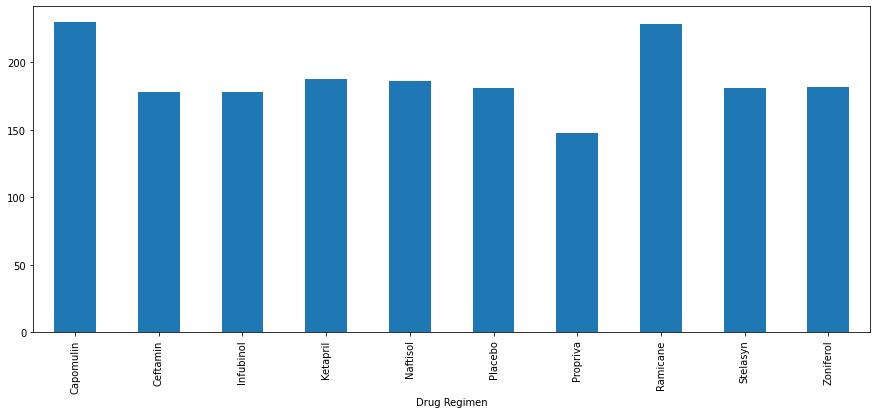

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
df = clean.groupby('Drug Regimen')['Timepoint'].count()
df.plot.bar(figsize=(15,6))


In [10]:
df.head()

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Name: Timepoint, dtype: int64

In [11]:
df.index

Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug Regimen')

In [12]:
df.values

array([230, 178, 178, 188, 186, 181, 148, 228, 181, 182], dtype=int64)

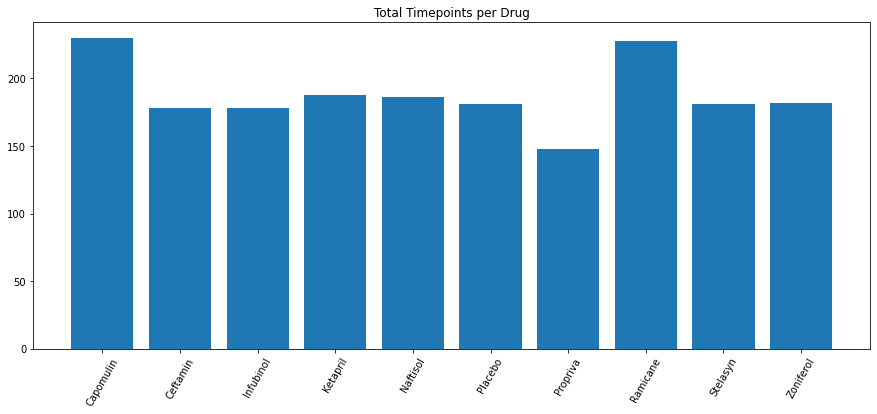

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=[15,6])
plt.xticks(rotation=60)
plt.title('Total Timepoints per Drug')
plt.bar(df.index,df.values)
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_count = clean['Sex'].value_counts()
labels = ['Male', 'Female']
gender_count

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

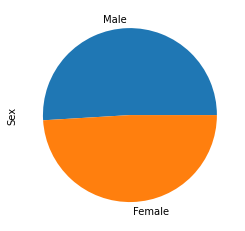

In [15]:
gender_count.plot(kind='pie', labels=labels)

([<matplotlib.patches.Wedge at 0x253c4f363a0>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

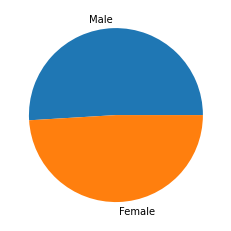

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_count, labels=labels)

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
high_time = clean.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
time_point = clean.merge(high_time, on=['Mouse ID','Timepoint'])
time_point.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drugs:
    tumors = time_point.loc[time_point['Drug Regimen'] == drug, 'Tumor Volume (mm3)']
    
    # add subset
    tumor_vol.append(tumors)

    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumors.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumors.loc[(tumors<lower_bound)|(tumors>upper_bound)]
    print(outliers)    

Series([], Name: Tumor Volume (mm3), dtype: float64)
Series([], Name: Tumor Volume (mm3), dtype: float64)
74    36.321346
Name: Tumor Volume (mm3), dtype: float64
Series([], Name: Tumor Volume (mm3), dtype: float64)


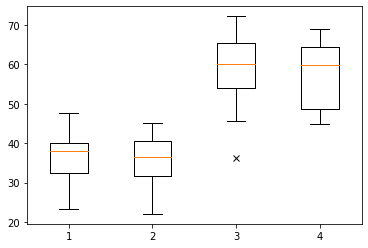

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interes
red_x = dict(markerfacecolor='r', marker='x')
plt.boxplot(tumor_vol, flierprops=red_x)
plt.show()

## Line and Scatter Plots

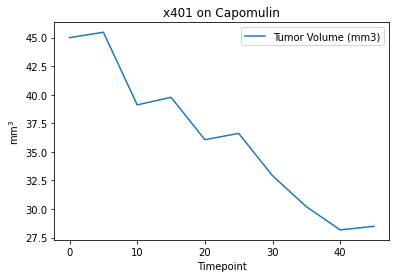

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
line_data = clean.loc[clean['Mouse ID'] == 'x401']
line_data.plot.line('Timepoint', 'Tumor Volume (mm3)')
plt.title('x401 on Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('mm$^3$')
plt.show()

<AxesSubplot:xlabel='Tumor Volume (mm3)', ylabel='Weight (g)'>

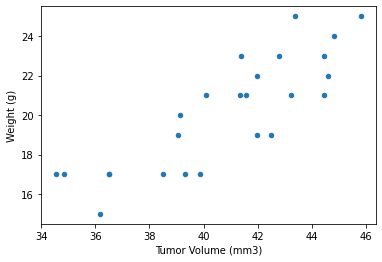

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scatter_data = clean.loc[clean['Drug Regimen'] == 'Capomulin']
each_mouse = scatter_data.groupby(['Mouse ID']).mean()
each_mouse.plot.scatter('Tumor Volume (mm3)', 'Weight (g)')

## Correlation and Regression

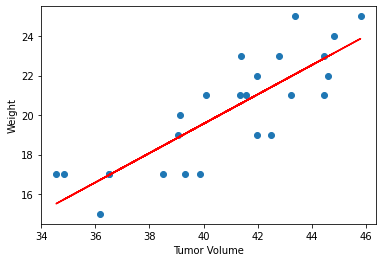

The correlation between both factors is 0.84


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = each_mouse['Tumor Volume (mm3)']
y_values = each_mouse['Weight (g)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Tumor Volume')
plt.ylabel('Weight')
plt.show()

correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")


---

Three Conclusions

1. As mouse tumor volume rises, mouse weight also rises.

 2.Capomulin reduced test mouse's tumor volume by nearly 50%

3. Infubinol and Ceftamin were used for larger tumors, while Capomulin and Ramicane were used for smaller tumors.